# SUPPA v1.1 vs. v1.2 benchmarking

Compares of Suppa corelation with Q-PCR data of Shen et al. 2012.



In [1]:
# Importing the data
from matplotlib import pyplot
from calc_funcs import *
from scipy.stats.stats import pearsonr
import os


%matplotlib inline

# Dimension setup
pyplot.rcParams['figure.figsize'] = (15.0, 8.0)


## Refseq annotation test

ESRP1 SAMPLE:
SUPA v1.1: PSI from sailfish numbers:
	Points covered: 59 (0.3598 %; removed 1 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (0.3963 %; removed 2 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.1: PSI from sailfish numbers:
	Points covered: 59 (0.3598 %; removed 1 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (0.3963 %; removed 2 point(s) duo to "duplicated" event)


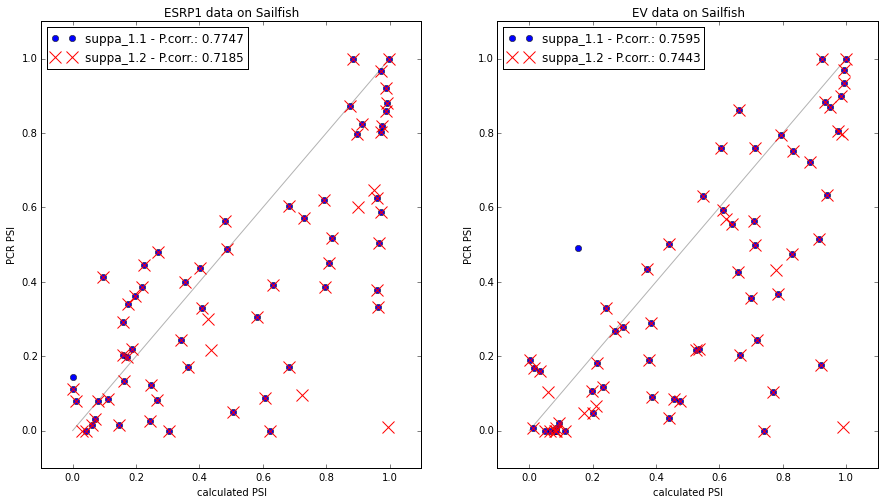

In [2]:
# makes setup
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

pcr_esrp1_events, pcr_ev_events = collect_pcr_psi()

print('ESRP1 SAMPLE:')
print('SUPA v1.1: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa1_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA v1.2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/refseq_sailfish_suppa2_esrp1.txt.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.1: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa1_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA v1.2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/refseq_sailfish_suppa2_ev.txt.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.1', sam2_lab='suppa_1.2')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.1', sam2_lab='suppa_1.2')



EV: Suppa_1.2 recovers more events. Slightly lower correlation (duo to newly recovered outliers). <br/>
ESRP1: Data is realy sparse, bad correlation in both cases.

## Ensembl annotation test

ESRP1 SAMPLE:
SUPA v1.1: PSI from sailfish numbers:
	Points covered: 89 (0.5427 %; removed 6 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 107 (0.6524 %; removed 9 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.1: PSI from sailfish numbers:
	Points covered: 89 (0.5427 %; removed 6 point(s) duo to "duplicated" event)
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 108 (0.6585 %; removed 9 point(s) duo to "duplicated" event)


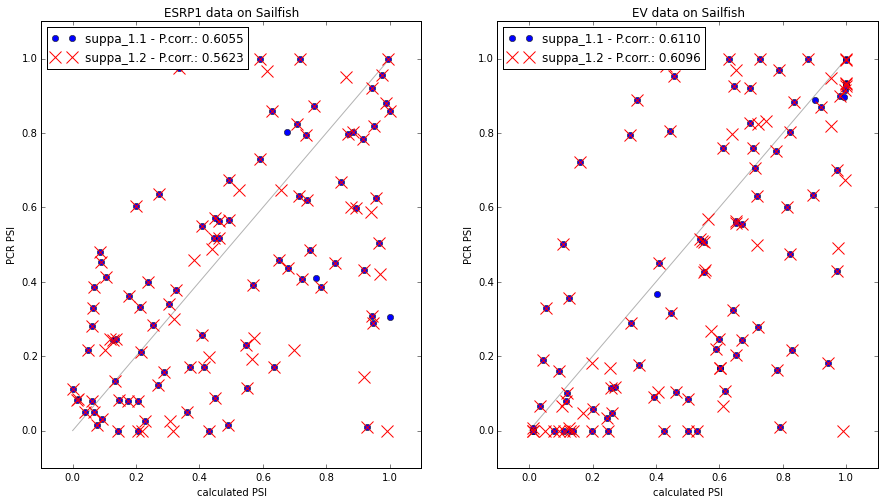

In [3]:
# makes setup
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

print('ESRP1 SAMPLE:')
print('SUPA v1.1: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/ensembl_sailfish_suppa1_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA v1.2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/ensembl_sailfish_suppa2_esrp1.txt.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.1: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/ensembl_sailfish_suppa1_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA v1.2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/ensembl_sailfish_suppa2_ev.txt.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.1', sam2_lab='suppa_1.2')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.1', sam2_lab='suppa_1.2')




<h2>Effect of total number of total-filter (-f) on correlation</h2>

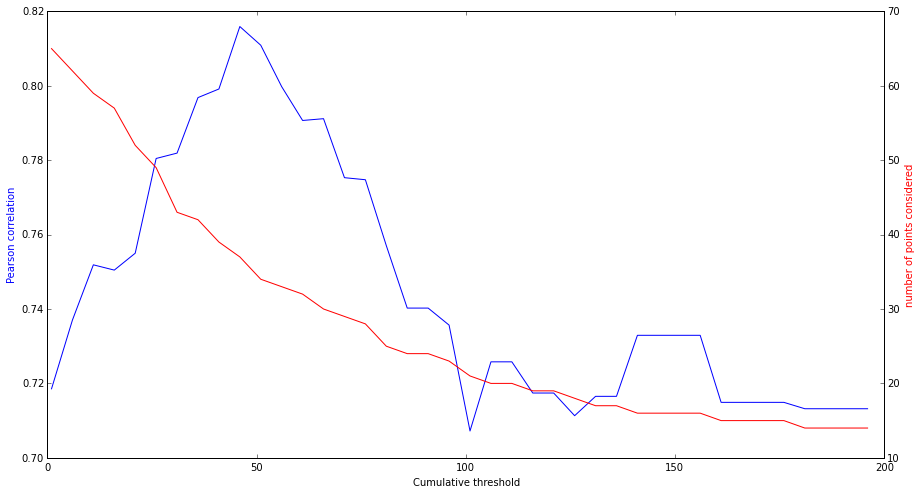

Suppa 1.2 Event results based on different Cumulative treshold


In [4]:
savepath = '../psi/SE_fparam_esrp1/'
points = []
for my_file in os.listdir(savepath):
    if my_file.endswith('.gtf'):
        continue
    suppa1_events = load_se_events(savepath + my_file)
    points1 = make_points_pairs(pcr_esrp1_events, suppa1_events, verbose=False)
    number = (int(my_file[28:-4]))
    cor = pearsonr(*zip(*points1))[0]
    points.append((number, cor, len(points1)))




x, y, z = zip(*sorted(points))
fig, ax1 = pyplot.subplots()
ax1.plot(x, y, 'b-')
ax1.set_xlabel('Cumulative threshold')
ax1.set_ylabel('Pearson correlation', color='b')

ax2 = ax1.twinx()
ax2.plot(x, z, 'r')
ax2.set_ylabel('number of points considered', color='r')
pyplot.show()
print('Suppa 1.2 Event results based on different Cumulative treshold')

# SUPPA v1.2 vs SUPPAx Tests

Here different (new) implementations are tested.

## SE PCR

Here SE event is considered to be pressent regarldess of neighbour boudries.

ESRP1 SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (0.3963 %; removed 2 point(s) duo to "duplicated" event)
SUPA SEpcr: PSI from sailfish numbers:
	Points covered: 70 (0.4268 %; removed 1 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (0.3963 %; removed 2 point(s) duo to "duplicated" event)
SUPA SEpcr: PSI from sailfish numbers:
	Points covered: 70 (0.4268 %; removed 1 point(s) duo to "duplicated" event)


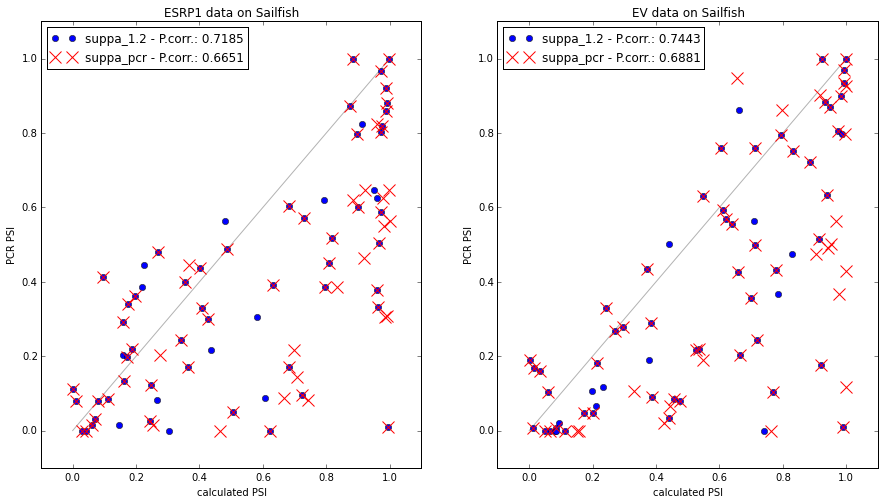

In [5]:
# makes setup
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

pcr_esrp1_events, pcr_ev_events = collect_pcr_psi()

print('ESRP1 SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA SEpcr: PSI from sailfish numbers:')
suppa2_events = load_sepcr_events('../psi/refseq_sailfish_SEpcr_esrp1.txt.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA SEpcr: PSI from sailfish numbers:')
suppa2_events = load_sepcr_events('../psi/refseq_sailfish_SEpcr_ev.txt.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr')

1 point in SEpcr is removed because of same gene is under two IDs.<br>
<h4>New exons:</h4>

In [6]:
# Print out events that occured 
new_ids = set(suppa2_events.keys()) - set(suppa1_events.keys())
pcr_events = set(pcr_esrp1_events.keys())
print('Newly recovered IDs are:')
for chro, beg, en in (new_ids & pcr_events):
    print('\t{}:{}-{}'.format(chro, beg, en))

Newly recovered IDs are:
	chr5:134688636-134688735
	chr9:33463031-33463132
	chr3:50389440-50389477
	chr1:153615703-153615840


<br>
Theese events are (complex) skip exons or alternative exon usages.
Example:
<img src="files/PCR_exons.jpg">
Figure: Gene transcripts (top) and Found SEs (Bottom)

Probably this is not the way we want to define PCR events.

<h2>SE PCR2</h2>

PCR v2 boundires are dynamic - addittional transcripts are added if they are within a given threshold.

Representation:
<img src="files/PCR2.jpg">

ESRP1 SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (0.3963 %; removed 2 point(s) duo to "duplicated" event)
SUPA pcr2: PSI from sailfish numbers:
	Points covered: 65 (0.3963 %; removed 2 point(s) duo to "duplicated" event)

EV SAMPLE:
SUPA v1.2: PSI from sailfish numbers:
	Points covered: 65 (0.3963 %; removed 2 point(s) duo to "duplicated" event)
SUPA pcr2: PSI from sailfish numbers:
	Points covered: 65 (0.3963 %; removed 2 point(s) duo to "duplicated" event)


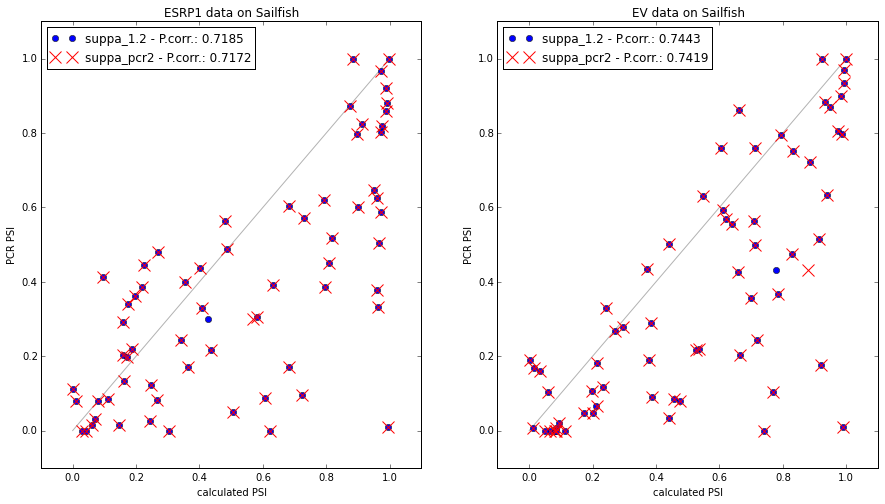

Threshold is set to 10.


In [7]:
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

print('ESRP1 SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_esrp1.txt.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('SUPA pcr2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/refseq_sailfish_SEpcr2_esrp1_th10.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('SUPA v1.2: PSI from sailfish numbers:')
suppa1_events = load_se_events('../psi/refseq_sailfish_suppa2_ev.txt.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('SUPA pcr2: PSI from sailfish numbers:')
suppa2_events = load_se_events('../psi/refseq_sailfish_SEpcr2_ev_th10.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr2')
plot_corelation(axes2, points3, points4, title='EV data on Sailfish',
                sam1_lab='suppa_1.2', sam2_lab='suppa_pcr2')
pyplot.show()
print('Threshold is set to 10.')

<h2>Does chaning threshold affect correlation?</h2>

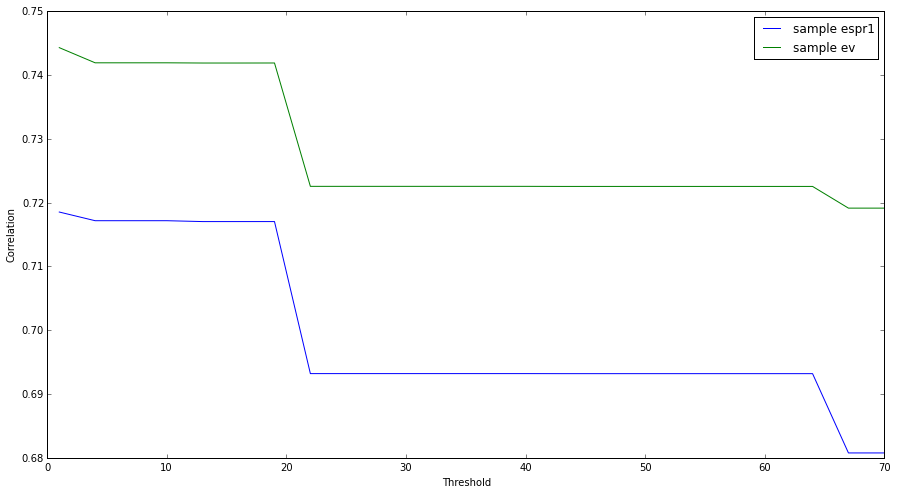

Figure: Effect of threshold on correlation with PCR (Refseq/Sailfish)


In [8]:
pcr_esrp1_events, pcr_ev_events = collect_pcr_psi()
savepath = '../psi/PCR2_series/'
savepath2 = '../psi/PCR2_series_ev/'
points = []
points_ev = []

# load esrp1
for my_file in os.listdir(savepath):
    if my_file.endswith('.gtf'):
        continue
    suppa1_events = load_se_events(savepath + my_file)
    points1 = make_points_pairs(pcr_esrp1_events, suppa1_events, verbose=False)
    number = (int(my_file[31:-4]))
    cor = pearsonr(*zip(*points1))[0]
    points.append((number, cor))

# Load EV
for my_file in os.listdir(savepath2):
    if my_file.endswith('.gtf'):
        continue
    suppa1_events = load_se_events(savepath2 + my_file)
    points1 = make_points_pairs(pcr_ev_events, suppa1_events, verbose=False)
    number = (int(my_file[28:-4]))
    cor = pearsonr(*zip(*points1))[0]
    points_ev.append((number, cor))


x, y = zip(*sorted(points))
_, z = zip(*sorted(points_ev))
_ = pyplot.plot(x, y, label='sample espr1')
_ = pyplot.plot(x, z, label='sample ev')
_ = pyplot.xlabel('Threshold')
_ = pyplot.ylabel('Correlation')
_ = pyplot.legend()
pyplot.show()
print('Figure: Effect of threshold on correlation with PCR (Refseq/Sailfish)')

<h1> RI events</h1>

New RI_pcr events  have been implemented. Following figure shows how the events are considered.
<img src="files/RI_implementations1.jpg">
Figure: RIpcr and RIpcr2 novelties



<h1>SS events</h1> 

New SS_pcr events have been implemented. Following figure shows how the events are considered.
<img src="files/SS_implementation.jpg">
Figure: SSpcr and SSpcr2 novelties

Note: 
- Getting loose of neighbour boudry introduces many new SS events.
- with "PCR" implementation RI events become a subgroup of SS events


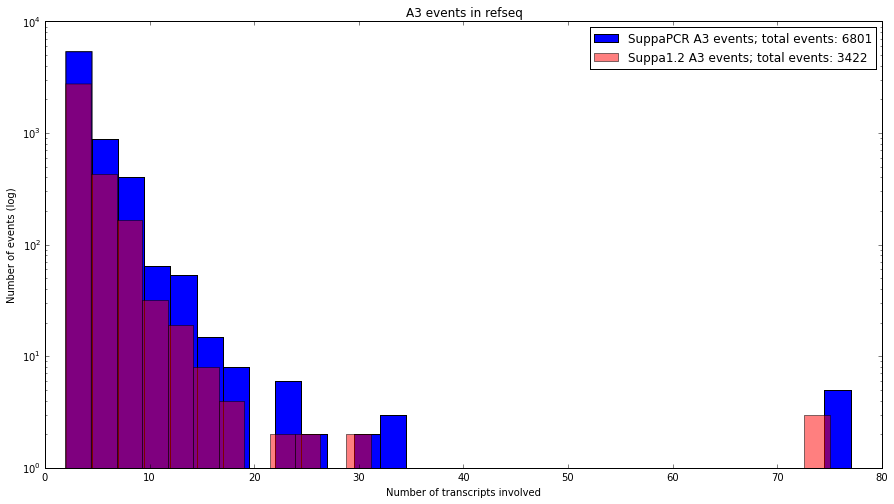

In [9]:
def import_events(file_path):
    """
    Imports ioe file and returs array with 
    number of transcripts involved in each events.
    """
    els_n = []
    with open(file_path, 'r') as handle:
        next(handle)
        for i in handle:
            els_n.append(len(i.strip().split('\t')[-1].split(',')))
    return els_n

v_12 = import_events('../ioe_SS/refseq_A3.ioe')
v_pcr = import_events('../ioe_SS/refseq_A3pcr.ioe')

pyplot.hist(v_pcr, bins=30, color='b', log=True, label='SuppaPCR A3 events; total events: {}'.format(len(v_pcr)))
pyplot.hist(v_12, bins=30, color='r', alpha=0.5, log=True, label='Suppa1.2 A3 events; total events: {}'.format(len(v_12)))
pyplot.title("A3 events in refseq")
pyplot.xlabel("Number of transcripts involved")
pyplot.ylabel("Number of events (log)")
pyplot.legend()
pyplot.show()

Suppa PCR  generates a lot more events

<h1>Arabidopsis thaliana Q-PCR comparisson</h1>

<h2>IR events</h2>


In [10]:
lhy_pcr_ri_t5 = [10.09722585, 8.882278866, 8.585137255]
lhy_pcr_ri_t20 = [48.66148401, 46.63044852, 48.20023962]
